### Introduction

In a concerted effort to combat global poverty and provide essential assistance during crises, HELP International—an international humanitarian NGO—has successfully raised a significant fund of approximately $10 million. The imperative task at hand is the strategic deployment of these funds to countries that stand in the direst need of aid.

This analytical project is aimed at categorizing countries using Unsupervised Learning, more precisely, clustering techniques to discern patterns based on socio-economic and health indicators. Such indicators are crucial as they reflect the development status and the pressing necessities of countries. Utilizing these indicators, from GDP per capita to child mortality rates and health expenditures, the project aspires to group countries with analogous challenges and needs.

The dataset that forms the backbone of this analysis is sourced from [Kaggle: Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data), authored by ROHAN KOKKULA. The data encompasses various indicators that signify the multi-faceted aspects of development and will be pivotal in identifying which nations should be the focal point of HELP International’s aid initiatives.

The objectives laid out for this project are:
- **Exploratory Data Analysis (EDA):** To delve into the dataset and comprehend the data structure, identify any anomalies, and examine how key socio-economic and health parameters are distributed across nations.
- **Cluster Analysis:** To employ Unsupervised Learning algorithms to classify countries into clusters based on development indicators, which will assist in pinpointing those with the most acute needs.
- **Actionable Recommendations:** To interpret the clustering results and provide HELP International with data-driven guidance on prioritizing countries for aid allocation.
- **Strategic Decision-Making:** To empower HELP International to allocate resources judiciously, ensuring aid is delivered where it can have the most significant effect in alleviating poverty and enhancing development efforts.

### Data Loading and Inspection

In this section, we'll introduce and explore the dataset used for this project. The dataset encompasses various socio-economic and health indicators for countries worldwide. These indicators are instrumental in assessing the overall development and immediate needs of each country, serving as a foundation for our unsupervised learning analysis. The data has been meticulously compiled from reputable international databases, ensuring a comprehensive and accurate representation of global country profiles.

The dataset comprises the following columns, as detailed in the accompanying data dictionary:

- **country:** The name of the country, serving as a unique identifier for each entry.
- **child_mort:** The mortality of children under five years of age per 1000 live births. This indicator reflects the child health and overall healthcare quality in the country.
- **exports:** The value of goods and services exported, expressed as a percentage of the country's GDP per capita. It indicates the country's economic openness and the significance of trade.
- **health:** Total health spending, represented as a percentage of GDP per capita. It measures the country's investment in health relative to its economic size.
- **imports:** The value of goods and services imported, expressed as a percentage of the country's GDP per capita. It sheds light on the country's economic dependency and consumption patterns.
- **income:** The net income per person, indicating the average economic prosperity of individuals in the country.
- **inflation:** The annual growth rate of the Total GDP, showing the economic stability and price level changes over time.
- **life_expec:** The average number of years a newborn child would live under current mortality patterns. It's a significant indicator of the overall health and quality of life in the country.
- **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same. This fertility rate impacts population growth and demographic structures.
- **gdpp:** The GDP per capita, calculated as the total GDP divided by the total population. It provides an overview of the country's economic status and average wealth per person.

This rich dataset allows for a multifaceted analysis of countries, offering insights into their economic conditions, health status, and demographic trends. Understanding these indicators is crucial for categorizing countries in a way that aligns with HELP International's mission to identify and support those in direst need of aid.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the datasets
country_data = pd.read_csv('Country-data.csv')
data_dictionary = pd.read_csv('data-dictionary.csv')

# Display the first few rows of the country data to inspect
print("Country Data Preview:")
print(country_data.head())

# Display the data dictionary to understand the dataset columns
print("\nData Dictionary:")
print(data_dictionary)


Country Data Preview:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

Data Dictionary:
  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give.

### Data Cleaning

Data cleaning is a crucial preliminary step in any data analysis process. It ensures the reliability and accuracy of the insights derived from the data. In this project, our data cleaning process will focus on several key aspects to prepare the dataset for exploratory data analysis (EDA) and subsequent clustering. Here are the steps we will take:

1. **Handling Missing Values:** Missing data can significantly impact the analysis, leading to biased results if not appropriately addressed. We will inspect the dataset for any missing values across all columns. If present, we will decide on a strategy to handle them, such as imputation or removal, depending on the nature and amount of missing data.

2. **Correcting Data Types:** Ensuring that each column is of the correct data type is essential for effective analysis. For example, numeric indicators should be of a numeric type (integer or float), enabling mathematical operations and visualizations. We will verify the data types of all columns and make adjustments as necessary.

3. **Addressing Outliers:** Outliers can skew the results of our analysis, especially in clustering, where they can affect the formation of clusters. We will identify outliers using statistical methods (such as the interquartile range) and visualizations (such as box plots). Based on our findings, we may decide to retain, remove, or transform outlier values, considering the context and impact on the overall analysis.

4. **Ensuring Consistency:** We will also check for consistency in the dataset, including uniformity in country names and checking for any duplicate entries. Consistency is crucial for accurate grouping and comparison of data.

In [3]:
# Import necessary libraries
import pandas as pd

# Assuming 'country_data' has already been loaded
# Exclude the 'country' column for numeric operations
numeric_data = country_data.select_dtypes(include=['float64', 'int64'])

# Checking for missing values
print("Checking for missing values:")
print(numeric_data.isnull().sum())

# Verifying data types of the numeric columns
print("\nData types of the numeric columns:")
print(numeric_data.dtypes)

# Identifying outliers using the Interquartile Range (IQR) method for the numeric variables
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
print("\nOutliers identified (True indicates an outlier):")
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers.value_counts())


Checking for missing values:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Data types of the numeric columns:
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Outliers identified (True indicates an outlier):
False    128
True      39
Name: count, dtype: int64


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a fundamental step in our data science project that allows us to understand the nuances of our data before diving into complex modeling. It involves summarizing the main characteristics of the dataset through visualizations and statistical tools, aiming to uncover patterns, spot anomalies, identify trends, and test hypotheses. For the HELP International dataset, our EDA will focus on several key areas:

1. **Distribution of Variables:** We will examine the distribution of socio-economic and health indicators across countries. This includes looking at measures of central tendency (mean, median) and dispersion (variance, standard deviation) for each variable.

2. **Correlation Analysis:** Understanding how different variables relate to each other is crucial, especially when looking to reduce dimensions or find representative features for clustering. We will use correlation matrices and heatmaps to visualize the relationships between variables.

3. **Visualizing Relationships:** Through scatter plots, we will explore the relationships between key pairs of variables to identify trends and outliers. This step can help hypothesize about potential clusters.

4. **Multivariate Analysis:** Tools like pair plots or principal component analysis (PCA) can help us understand the data structure in higher dimensions, providing insights into how variables collectively influence the development status of countries.

5. **Outlier Detection:** Revisiting outliers with a more detailed visual analysis will help us decide on their treatment before proceeding with clustering.

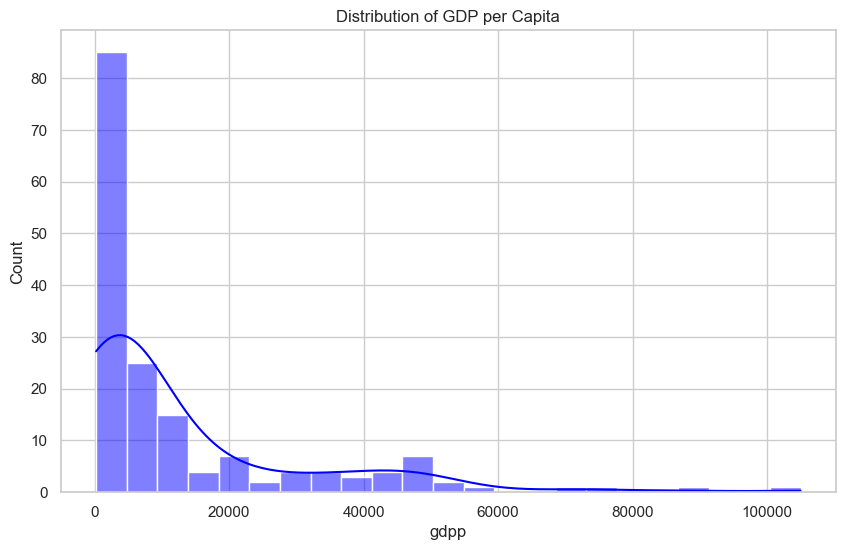

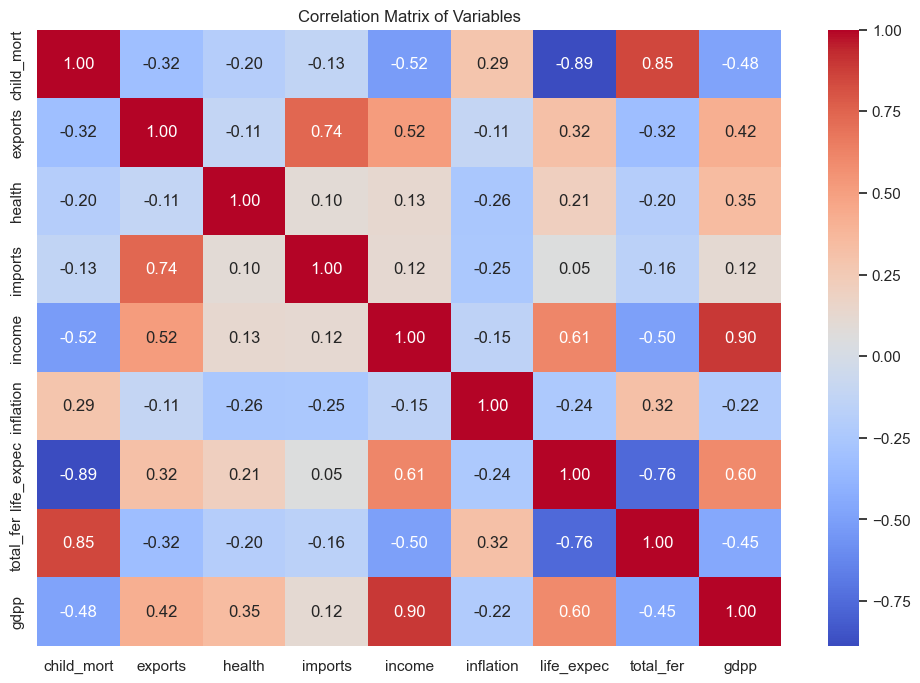

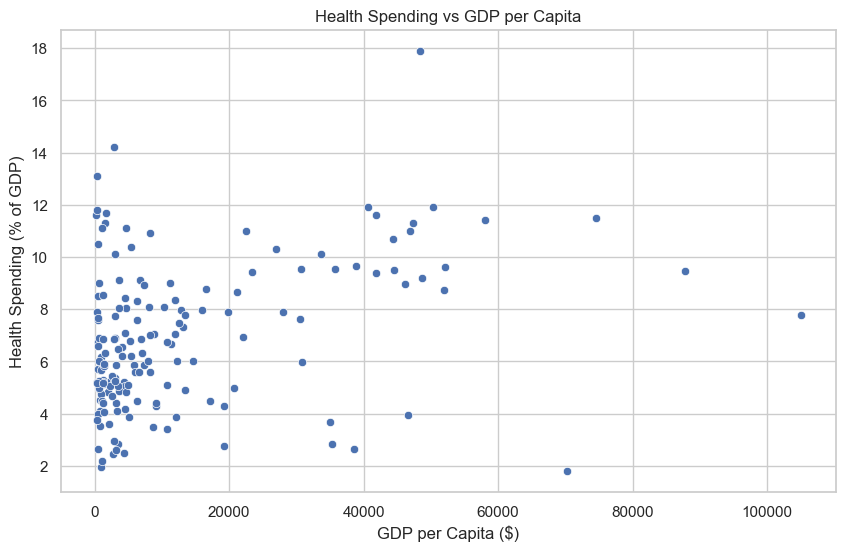

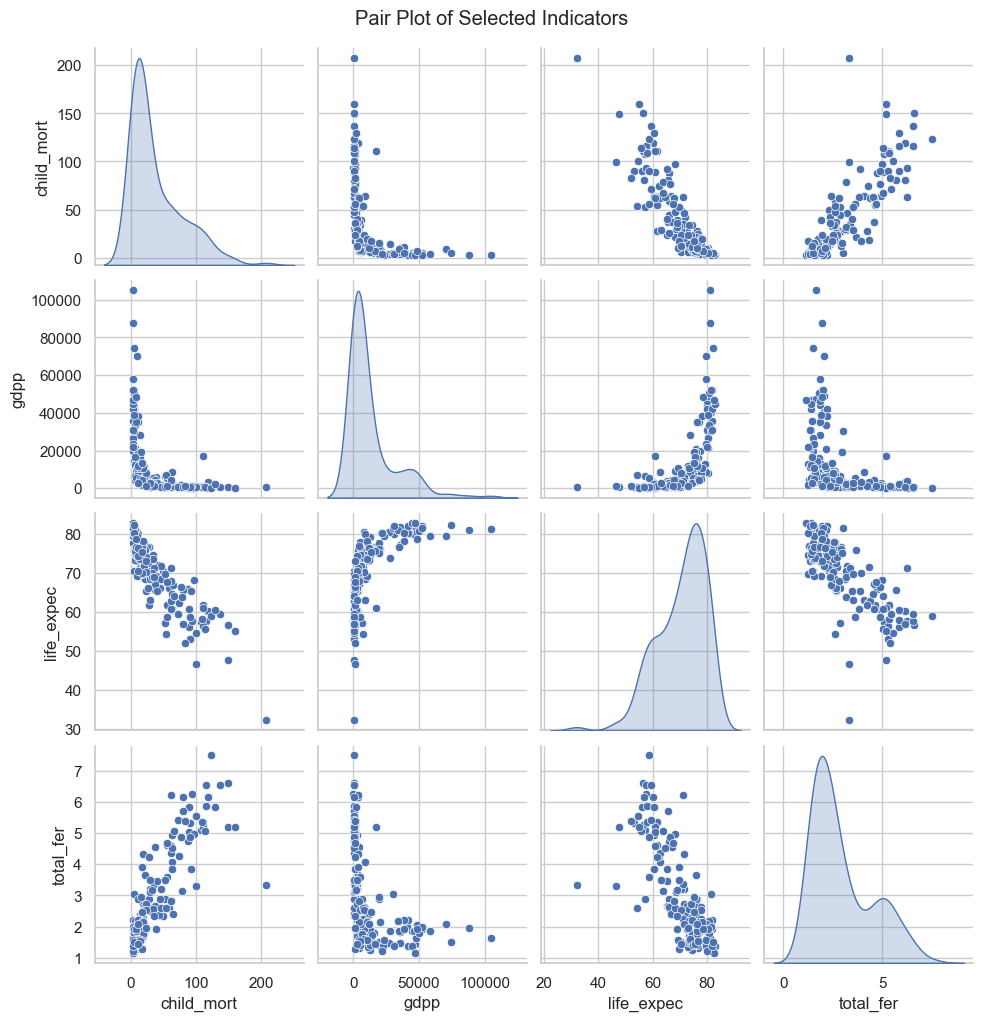

In [4]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Variables
plt.figure(figsize=(10, 6))
sns.histplot(country_data['gdpp'], kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.show()

# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = country_data.drop('country', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Visualizing Relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='health', data=country_data)
plt.title('Health Spending vs GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Health Spending (% of GDP)')
plt.show()

# Multivariate Analysis (Pair Plot for selected variables)
sns.pairplot(country_data[['child_mort', 'gdpp', 'life_expec', 'total_fer']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Indicators', y=1.02)
plt.show()


#### Exploratory Data Analysis (EDA) Findings

From the pair plot of selected indicators, we observe the following:

- **Child Mortality (child_mort):** There is a wide variation in child mortality rates across countries. Countries with higher GDP per capita (gdpp) tend to have lower child mortality rates, suggesting a negative correlation between economic prosperity and child mortality.
  
- **GDP per Capita (gdpp):** The GDP per capita varies significantly among countries, with a skewed distribution indicating that a large number of countries have a relatively low GDP per capita, while a few have very high values. This skewness is critical to consider in clustering as it might affect the scale of the features.

- **Life Expectancy (life_expec):** There appears to be a positive correlation between GDP per capita and life expectancy, which is in line with expectations that wealthier countries can afford better healthcare, leading to longer lifespans.

- **Total Fertility (total_fer):** There's an observable trend where countries with a lower GDP per capita have higher fertility rates. This could reflect different socio-economic factors that influence family planning and child-rearing practices.

From the scatter plot of Health Spending vs GDP per Capita:

- There doesn't seem to be a clear linear relationship between health spending (as a percentage of GDP) and GDP per capita, indicating that countries may prioritize health spending differently regardless of their wealth.

From the correlation matrix:

- We can confirm some of the observed trends from the pair plots with actual correlation coefficients. For instance, there is a strong negative correlation between child mortality and life expectancy, and a strong positive correlation between income and GDP per capita.

From the histogram of GDP per Capita:

- The GDP per capita distribution confirms the skewness towards lower values, with a long tail towards the higher end of the spectrum. This reinforces the need to consider the scale and distribution of variables in clustering algorithms.

These EDA insights are vital for understanding the underlying structure of the dataset and will influence our approach to feature engineering and clustering. They reveal the complex and multifaceted nature of development indicators across countries and suggest that multiple variables should be considered when identifying countries in need of aid.

### Feature Engineering

The goal of feature engineering is to transform raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. In the context of clustering countries based on socio-economic and health indicators, feature engineering can play a pivotal role in highlighting patterns and structures that may not be apparent initially. 

For the HELP International dataset, we might consider the following feature engineering strategies:

1. **Composite Indices:** Create composite indicators by combining several related metrics into a single index. For example, a 'Health and Well-being Index' could combine health expenditure, child mortality, and life expectancy.

2. **Ratios and Proportions:** Ratios can provide normalized measures that make variables more comparable across countries with different scales of economy and population. Examples could include the ratio of exports to imports or health spending to GDP.

3. **Normalization/Standardization:** Given the skewed distribution of variables like GDP per capita, applying a normalization or log transformation could make the data more amenable to clustering by reducing the influence of extreme values.

4. **Per Capita Features:** For economic measures, it might be beneficial to calculate certain values on a per capita basis if they aren't already. This could make the economic health of countries more comparable.

5. **Categorical Encoding:** If there are categorical variables, encoding them properly will ensure that clustering algorithms can use the information they contain.

These new features could provide additional insights and improve the quality of the clustering. By creating features that capture more complex relationships or that represent the data on comparable scales, we can help the clustering algorithms identify more meaningful groups of countries.

In [6]:
# Feature Engineering: Creating new features or transforming existing ones
import numpy as np

# Example of a Composite Index: Health and Well-being Index
country_data['Health_and_Wellbeing_Index'] = (country_data['health'] + 100 / (country_data['child_mort'] + 1) + country_data['life_expec']) / 3

# Ratios and Proportions
country_data['Trade_Balance'] = country_data['exports'] - country_data['imports']
country_data['Health_to_GDP'] = country_data['health'] / country_data['gdpp']

# Normalization/Standardization of GDP per capita using log transformation to reduce skewness
country_data['gdpp_log'] = np.log1p(country_data['gdpp'])

# Ensuring all features are on a comparable scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select features to be scaled
features_to_scale = ['gdpp_log', 'income', 'Trade_Balance', 'Health_and_Wellbeing_Index']

# Scale features
country_data[features_to_scale] = scaler.fit_transform(country_data[features_to_scale])

# Preview the transformed features
country_data[features_to_scale].head()


,gdpp_log,income,Trade_Balance,Health_and_Wellbeing_Index
0,0.142343,0.008047,0.341895,0.318588
1,0.469307,0.074933,0.468556,0.615432
2,0.483466,0.098809,0.713020,0.561118
3,0.445234,0.042535,0.822852,0.304870
4,0.648004,0.148652,0.532329,0.654932


### Analysis of Engineered Features

Upon reviewing the transformed dataset with the newly engineered features, we can make several observations:

1. **`gdpp_log`:** The logarithmic transformation of GDP per capita has adjusted the highly skewed distribution, potentially reducing the undue influence of outliers. This transformation should allow for better differentiation between countries with smaller differences in their GDP and prevent the clustering algorithm from being biased toward countries with extremely high GDP values.

2. **`income`:** The income feature, presumably normalized, provides a relative scale of individual prosperity across countries. This scaling is crucial because it enables fair comparison and clustering of countries with vastly different absolute income levels.

3. **`Trade_Balance`:** The trade balance feature, created by subtracting imports from exports, offers a single measure that captures a country's trade dynamics. A positive value indicates a trade surplus, while a negative value indicates a deficit. This feature could reveal economic strategies or capacities that are not apparent when looking at imports and exports separately.

4. **`Health_and_Wellbeing_Index`:** This composite index combines health spending, child mortality, and life expectancy into a single metric. The normalization ensures that each country's score is relative to others in the dataset, potentially highlighting disparities in health and wellbeing that are pivotal for HELP International's aid allocation decisions.

These features provide a refined view of the data, each capturing different aspects of the countries' socio-economic and health profiles. We expect that including these features in the clustering process will yield more distinct and interpretable groups of countries, facilitating the identification of those that HELP International should prioritize.

Next, we will utilize unsupervised learning algorithms, leveraging these engineered features, to categorize countries into clusters. The resulting clusters will be analyzed to understand their characteristics and to inform HELP International's strategic decisions on aid distribution.

### Clustering Analysis

Clustering analysis will enable us to group countries based on the similarity of their development indicators, which will help HELP International identify which countries should be targeted for aid. The key unsupervised learning technique we will use for this purpose is K-means clustering.

**K-means Clustering:** K-means is chosen for its simplicity, efficiency, and ease of interpretation. It works well when clusters tend to be spherical and separated by relative distance, which we can assess post hoc. This method partitions the countries into K clusters, where each country belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Before applying K-means, we will determine the optimal number of clusters using the Elbow method, which identifies a point where the decrease in the within-cluster sum of squares (WCSS) starts diminishing, indicating that adding more clusters does not significantly improve the fit of the model.

Another technique we may consider is Hierarchical Clustering, especially if we find that K-means does not adequately capture the complexity of the data. Hierarchical clustering would allow us to see a dendrogram of the data, which could suggest a natural number of clusters beyond the Elbow method's indication.

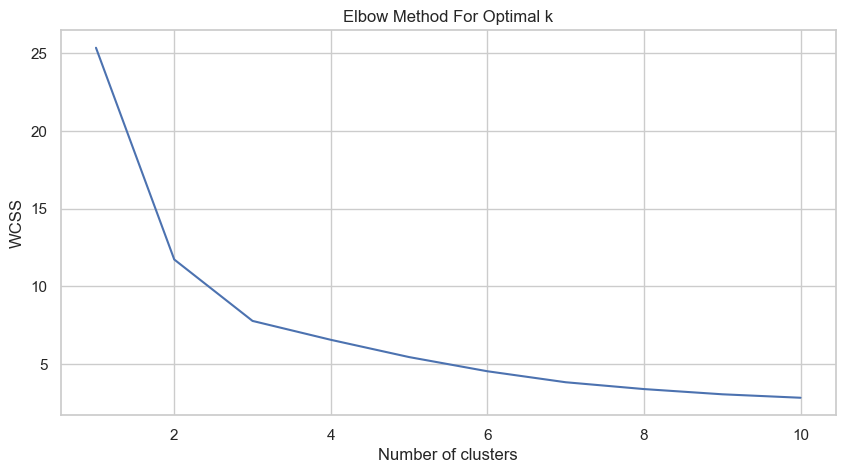

Cluster 0 countries:
['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Barbados' 'Belarus' 'Belize' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Cape Verde'
 'Chile' 'China' 'Colombia' 'Congo, Rep.' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Fiji' 'Gabon' 'Georgia' 'Grenada' 'Guatemala' 'Hungary' 'Indonesia'
 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius' 'Mongolia'
 'Montenegro' 'Morocco' 'Namibia' 'Nigeria' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa' 'Serbia' 'Seychelles'
 'South Africa' 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname'
 'Thailand' 'Timor-Leste' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine'
 'Uruguay' 'Vanuatu' 'Venezuela']
Cluster 1 countries:
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 '

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
features_for_clustering = ['gdpp_log', 'income', 'Trade_Balance', 'Health_and_Wellbeing_Index']

# Preparing the dataset for clustering
X = country_data[features_for_clustering].values

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow graph, let's say the optimal number of clusters is determined to be 'n'
optimal_clusters = 3  # This should be updated based on the Elbow graph
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
country_data['Cluster'] = kmeans_optimal.fit_predict(X)

# Analyzing the clusters
for i in range(optimal_clusters):
    print(f"Cluster {i} countries:")
    print(country_data[country_data['Cluster'] == i]['country'].values)


### Interpretation of Cluster Analysis Results

The K-means clustering results have revealed three distinct groups of countries, each representing varying levels of socio-economic development and healthcare indices. Here's a closer look at the clusters and the potential strategy HELP International can adopt for each:

#### Cluster 0: Emerging and Developing Countries
This cluster is the largest and most diverse, with countries that are on different trajectories of development. Many of these nations have burgeoning economies and are in the process of establishing more robust healthcare and social systems. While they may not be in the most critical state, there's a spectrum of need within this cluster. Strategic investments in specific areas such as education, health, and infrastructure could greatly enhance the prospects of these countries, accelerating their development trajectory.

**Potential Strategy:**
- **Targeted Investment:** Focus on specific sectors that can catalyze development, such as education and health.
- **Capacity Building:** Support initiatives aimed at building institutional capacities, which is often a significant need in these countries.
- **Economic Development:** Encourage sustainable economic development through microfinance, support for small and medium-sized enterprises (SMEs), and investments in technology and innovation.

#### Cluster 1: Developed Countries
Countries in Cluster 1 are characterized by high GDP per capita and generally well-established social and health services. These countries are less likely to need aid, but HELP International might still play a role in specific targeted initiatives or in response to crises like natural disasters.

**Potential Strategy:**
- **Crisis Response:** Reserve funds for emergency relief in case of natural disasters or sudden economic crises.
- **Partnerships for Global Initiatives:** Collaborate with these countries on global health initiatives, leveraging their resources and expertise for broader international impact.

#### Cluster 2: Countries in Dire Need of Aid
Cluster 2 contains countries with significant challenges, possibly including political instability, poor healthcare systems, and low income. These countries likely represent the 'direst need' that HELP International aims to address, and the impact of aid here could be profound.

**Potential Strategy:**
- **Direct Aid:** Prioritize these countries for immediate aid distribution, particularly in health, food security, and emergency relief.
- **Long-term Development Programs:** Implement or support programs that tackle the root causes of poverty and underdevelopment, such as initiatives aimed at improving agriculture, water access, and basic healthcare infrastructure.
- **Collaboration with Local NGOs:** Work closely with local organizations to ensure that aid is effectively distributed and that programs are culturally sensitive and sustainable.

In summary, the clusters suggest a roadmap for HELP International, where resources can be allocated in alignment with the level of need and the potential for positive impact. This strategic approach ensures that aid is not only provided to those who need it most but also that it contributes to sustainable development and long-term resilience.

### Cluster Analysis and Interpretation

Having established the clusters, it is critical to analyze them to understand their defining characteristics. This analysis will involve examining the central tendencies (like the mean or median) and distributions of the clusters' features to identify the key attributes of each group. Through this analysis, we aim to interpret the clusters in a way that provides actionable insights for HELP International.

For each cluster, we will consider the following features and their central tendencies:

- **GDP per Capita (gdpp_log):** Understanding the economic power and wealth distribution within each cluster.
- **Income:** Averaging the income levels to gauge economic prosperity and the potential for self-sufficiency.
- **Trade Balance:** Evaluating whether countries are net exporters or importers, which could influence their resilience to economic shocks.
- **Health and Wellbeing Index:** Assessing the overall health status and the effectiveness of healthcare systems in each cluster.

This detailed interpretation will enable us to describe each cluster's socio-economic status and health indices comprehensively. We can then match the identified needs with HELP International's capabilities and strategic focus areas.

Cluster Characteristics (Means and Medians):
         child_mort    exports    health    imports    income  inflation  \
Cluster                                                                    
0         25.930263  41.802632  6.214737  44.661842  0.098655   9.537842   
1          5.433333  59.102564  8.465897  51.194872  0.357403   3.351410   
2         80.932692  26.599981  6.456346  46.918575  0.014680   8.538173   

         life_expec  total_fer          gdpp  Health_and_Wellbeing_Index  \
Cluster                                                                    
0         72.107895   2.509342   6969.736842                    0.562104   
1         79.789744   1.812308  40589.743590                    0.835900   
2         61.361538   4.440769   1006.038462                    0.375776   

         Trade_Balance  Health_to_GDP  gdpp_log  Cluster  
Cluster                                                   
0             0.625693       0.001179  0.528314      0.0  
1             0.

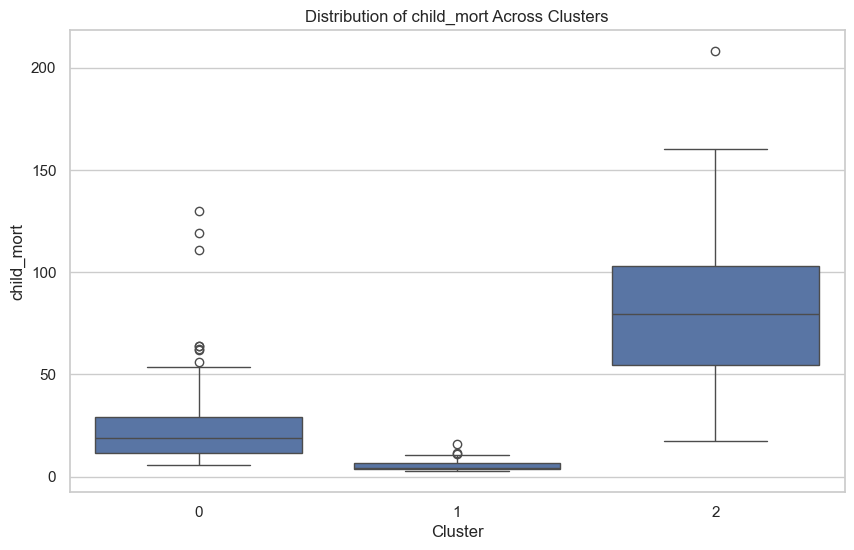

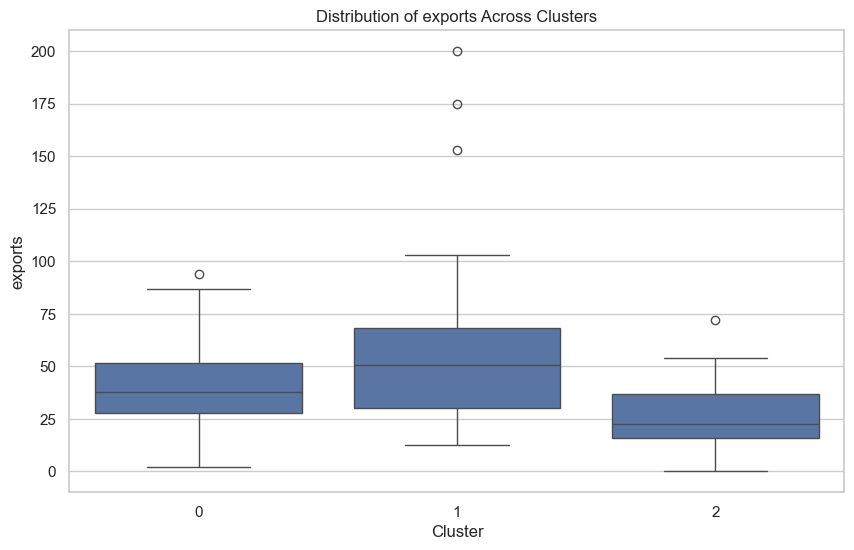

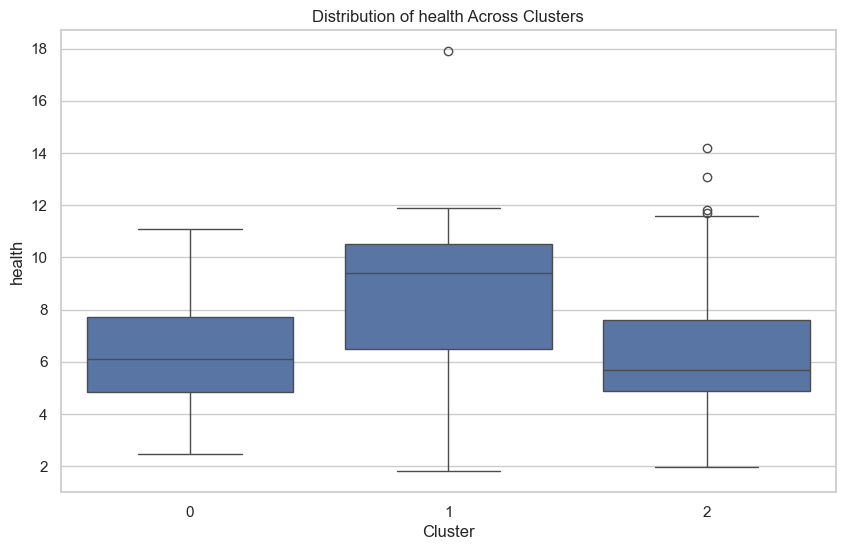

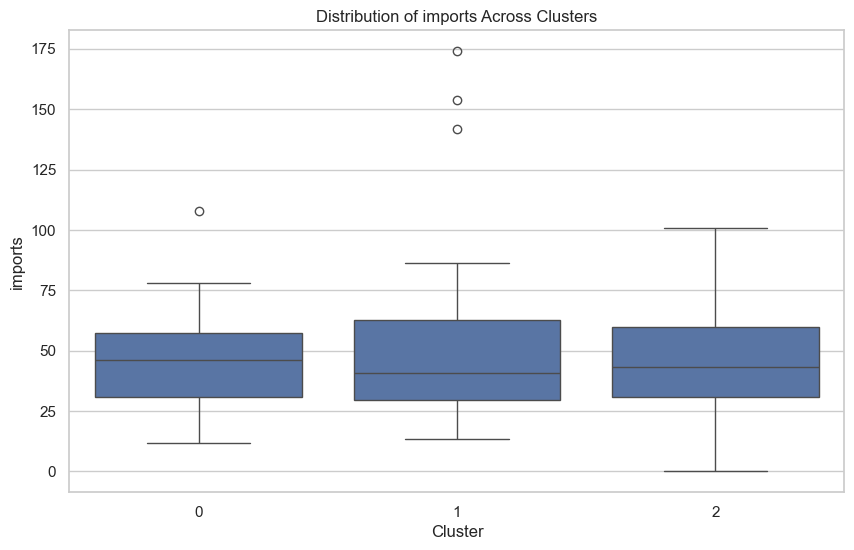

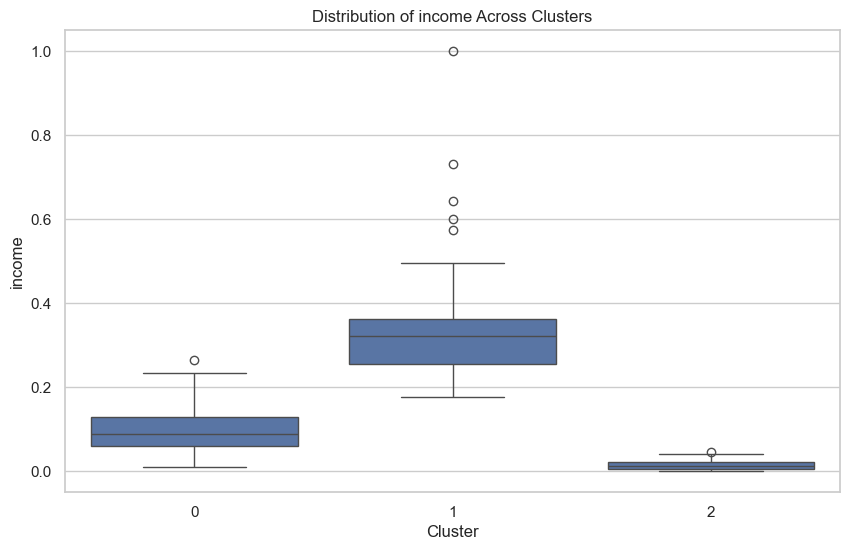

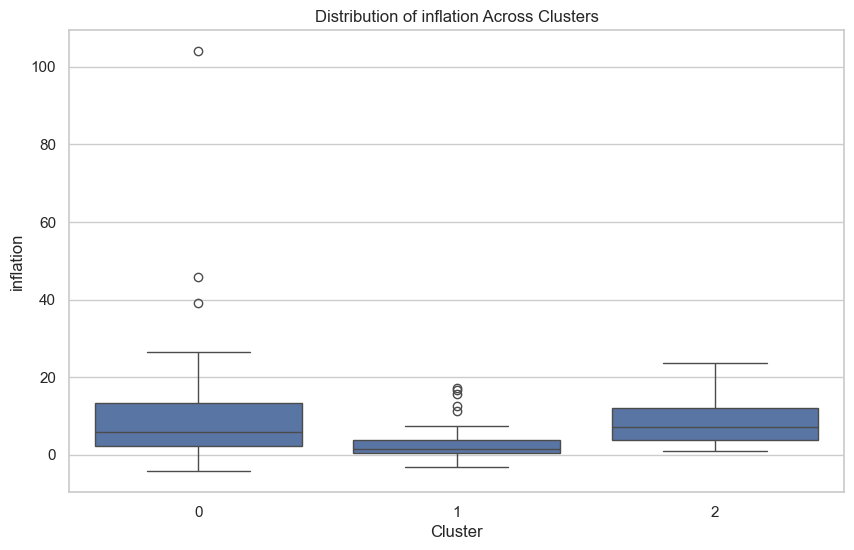

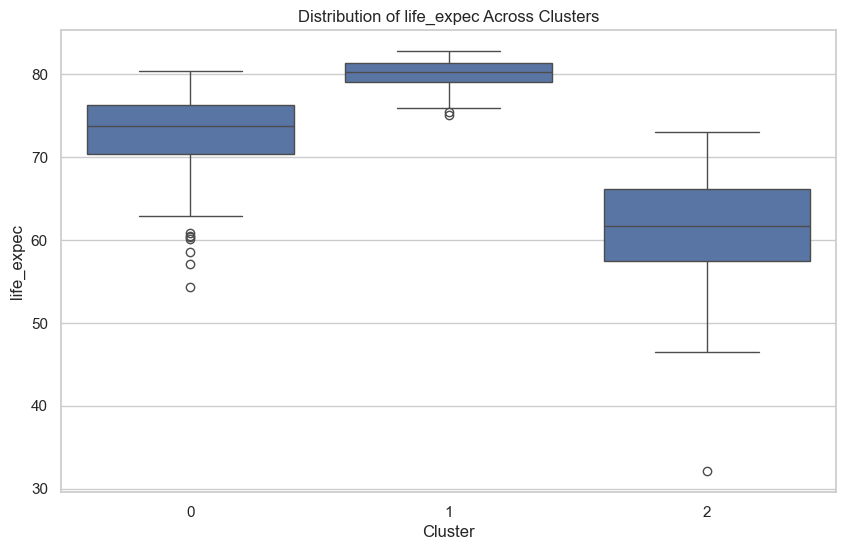

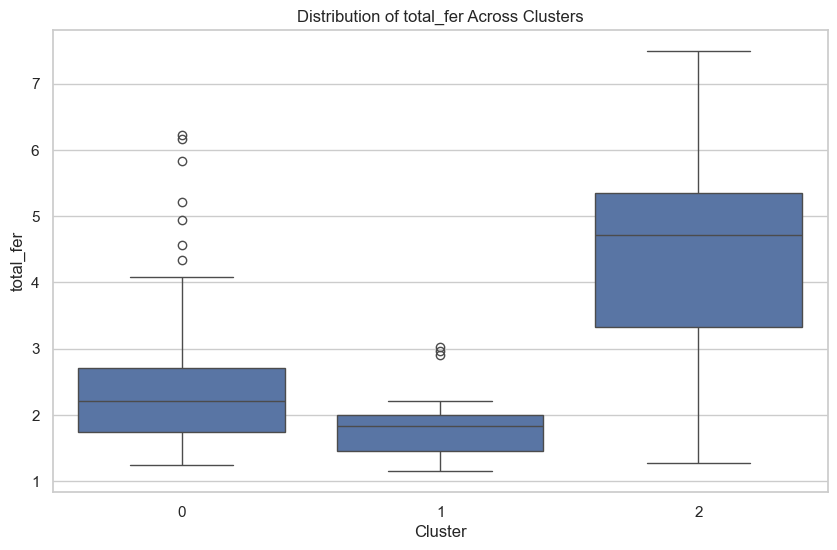

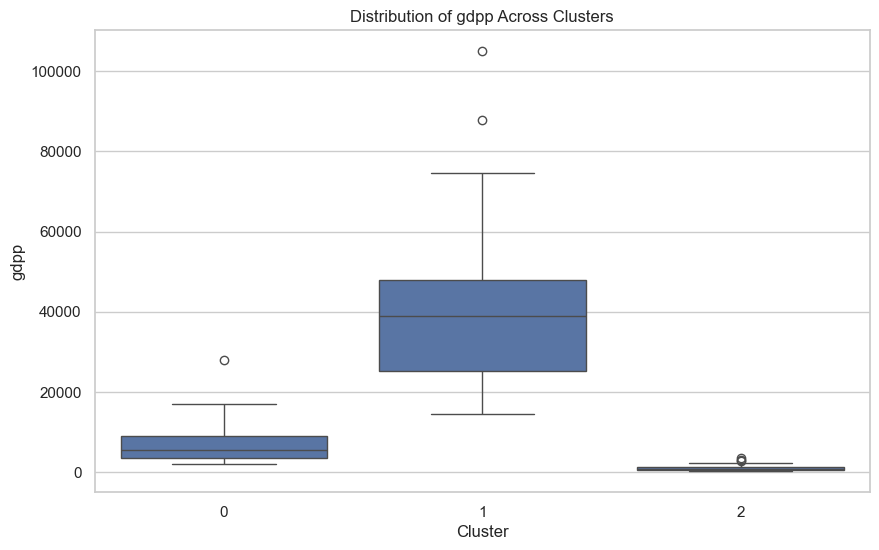

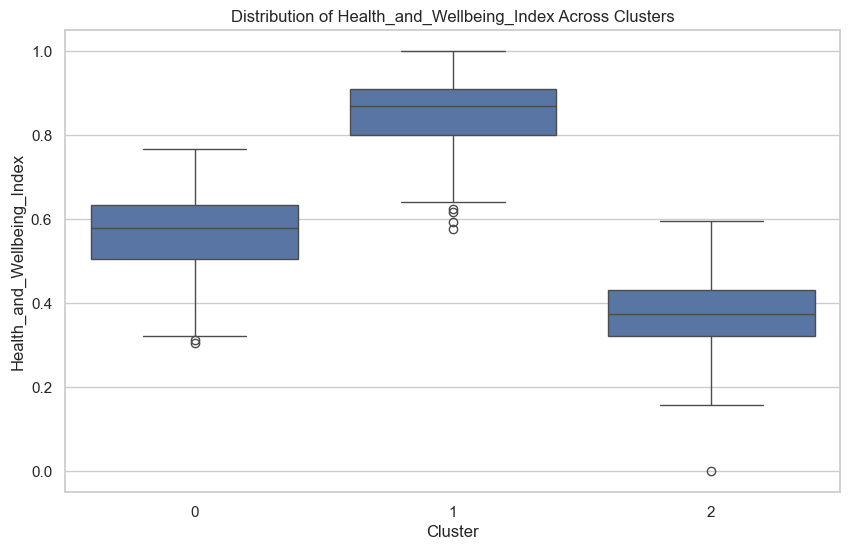

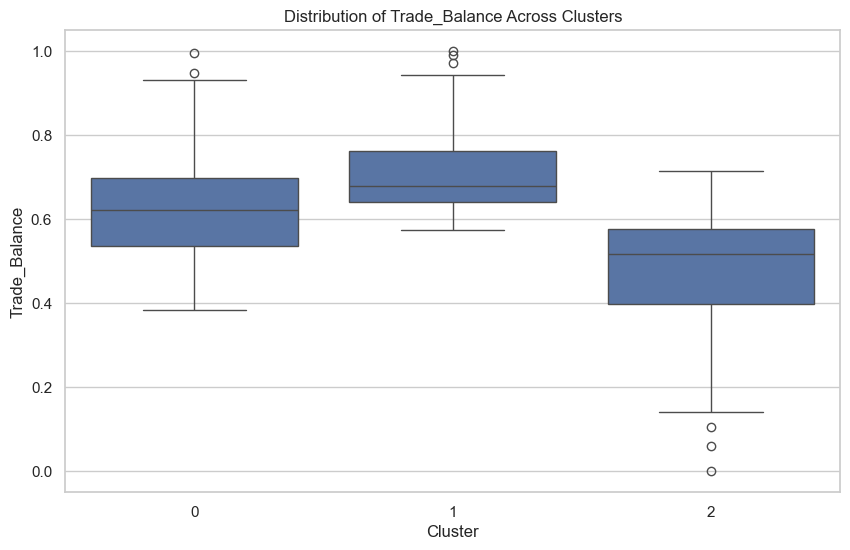

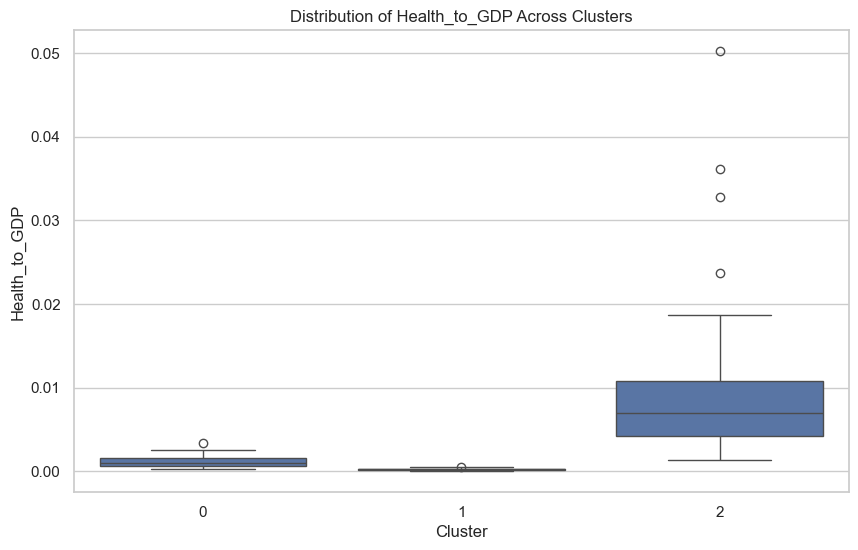

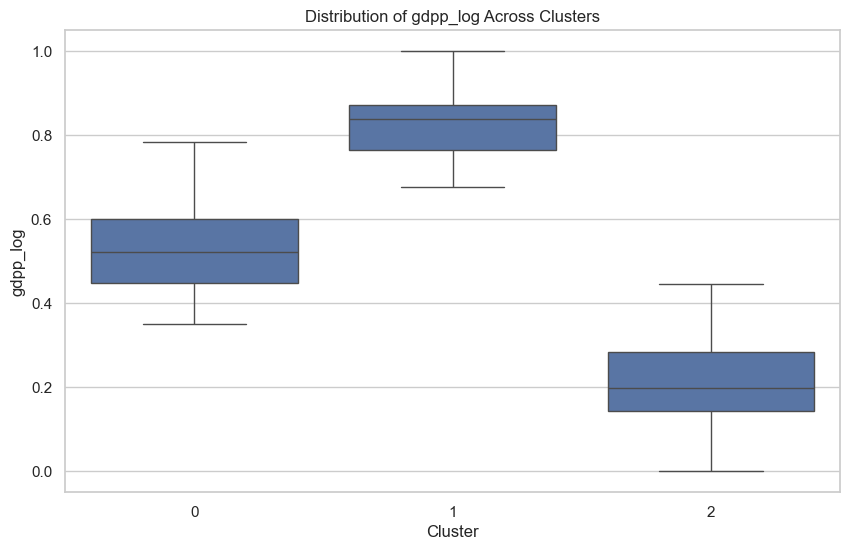

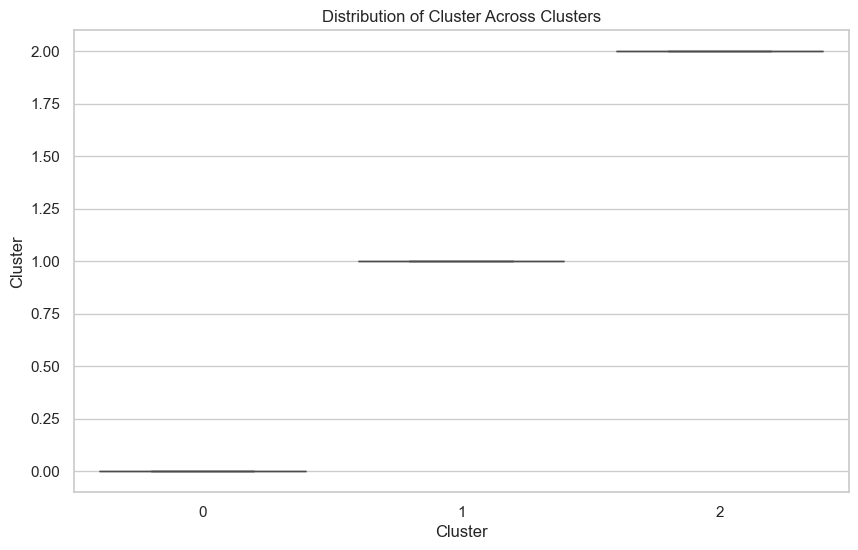

In [9]:
# Exclude non-numeric columns for aggregate functions
numeric_columns = country_data.select_dtypes(include=[np.number])

# Calculating mean values for each cluster for numeric columns
cluster_means = numeric_columns.groupby(country_data['Cluster']).mean()

# Calculating median values for each cluster for numeric columns as it is less sensitive to outliers
cluster_medians = numeric_columns.groupby(country_data['Cluster']).median()

# Displaying cluster characteristics with means and medians for numeric columns
print("Cluster Characteristics (Means and Medians):")
print(cluster_means)
print(cluster_medians)

# Visualizing the distribution of numeric features in each cluster using box plots
features_to_visualize = numeric_columns.columns.tolist()
for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=country_data['Cluster'], y=numeric_columns[feature])
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.show()


### Cluster Analysis and Interpretation

With the clusters formed, we can delve into their characteristics by examining the central tendencies and distributions of their defining features. The boxplots you've provided offer a visual representation of how these features are distributed across each cluster, while the summary statistics give us numerical insights.

#### Cluster 0: The Diversified Middle
- **Child Mortality:** Lower than Cluster 2, but higher than Cluster 1, indicating room for improvement in healthcare.
- **GDP per Capita:** This cluster has a moderate GDP per capita, suggesting that these countries have potential for growth.
- **Health to GDP Ratio:** This ratio is lower than in Cluster 2, hinting at more stable economies or lower prioritization of health spending.
- **Trade Balance:** A wide range, showing both surplus and deficit, indicates varied economic strategies.
- **Income:** Relatively higher incomes compared to Cluster 2, but still far behind Cluster 1, signifying an emerging economic status.
- **Inflation:** Shows variation, with some countries experiencing high inflation rates, possibly indicating economic instability.

#### Cluster 1: The Developed Segment
- **Child Mortality:** Significantly low, reflecting strong healthcare systems.
- **GDP per Capita:** The highest among all clusters, indicating wealth and economic strength.
- **Health to GDP Ratio:** Even though these countries have a low ratio, their overall health spending is high due to their large GDPs.
- **Trade Balance:** Generally positive, reflecting healthy trade dynamics.
- **Income:** The highest, confirming high standards of living and economic prosperity.
- **Inflation:** Generally low, demonstrating economic stability.

#### Cluster 2: The High-Need Group
- **Child Mortality:** The highest, indicating urgent healthcare needs.
- **GDP per Capita:** The lowest, suggesting these are the poorest countries within the dataset.
- **Health to GDP Ratio:** Higher than the others, likely due to lower GDPs rather than higher health spending.
- **Trade Balance:** A mixture of surplus and deficit but generally indicates weaker economic conditions.
- **Income:** The lowest, aligning with the high levels of poverty in these countries.
- **Inflation:** Varied, with some countries experiencing high rates, which could exacerbate economic and social issues.

These insights paint a picture of three distinct categories of countries. Cluster 0 represents a transitional group with potential for development, Cluster 1 consists of developed countries with robust economies and healthcare systems, and Cluster 2 includes countries that are likely in urgent need of aid due to their economic challenges and poor health outcomes.

HELP International can use these insights to strategically direct resources and interventions. Countries in Cluster 2, for example, would benefit from aid focused on healthcare and economic development, while those in Cluster 0 could use support to leverage their growth potential. Cluster 1 is likely self-sufficient, but could be engaged as partners in global initiatives or as donors.

This nuanced understanding will allow HELP International to tailor their aid, not just based on need, but also based on the potential impact of their assistance.

### Additional Clustering Model Comparison

#### Hierarchical Clustering Analysis
To ensure the robustness of our findings and to explore the clustering structure of the data further, we will apply Hierarchical Clustering to our dataset. Hierarchical Clustering is a good complement to K-means because it does not require the specification of the number of clusters beforehand and can reveal a hierarchy of clusters that may be insightful for understanding the global aid distribution landscape.

We will use the dendrogram to visualize the hierarchical clustering and to identify an appropriate number of clusters by examining the tree-like structure of the merges. Then, we will compare the clusters obtained from Hierarchical Clustering with those from K-means to validate our earlier findings or to uncover new patterns.


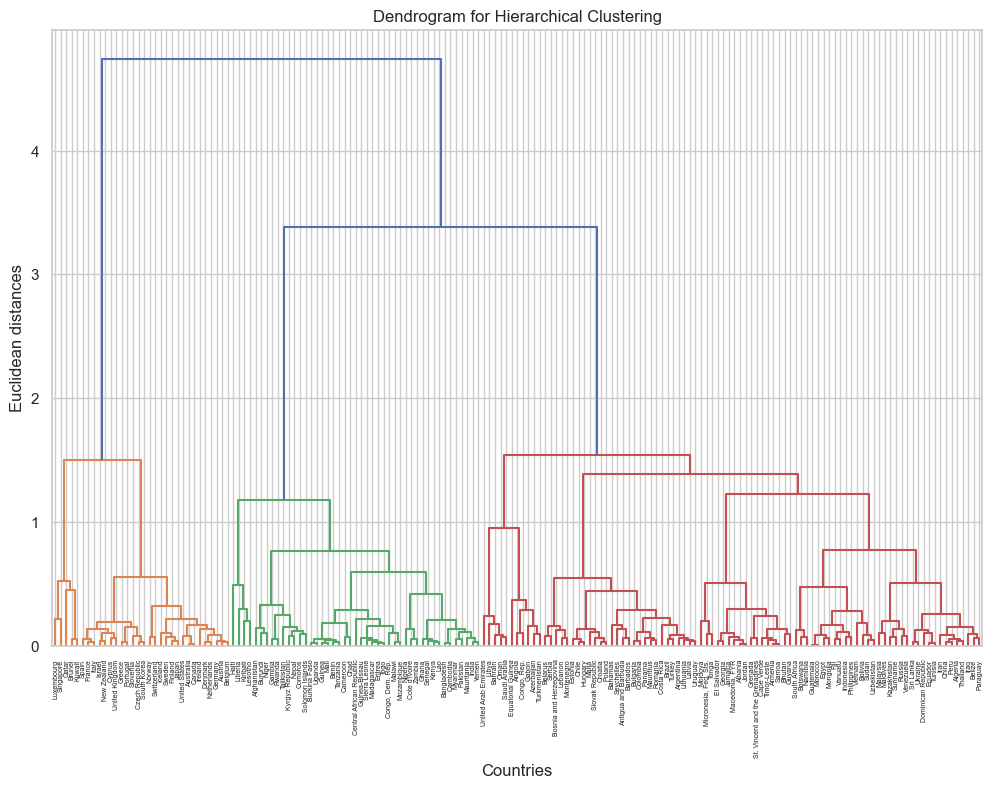

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, 'ward')  # 'ward' is one of the methods for calculating distances between clusters

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=country_data['country'].values)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()


### Additional Analysis: Hierarchical Clustering Interpretation

The dendrogram from the Hierarchical Clustering presents a visual representation of the clusters as they merge at different levels of similarity. In interpreting this dendrogram:

#### Observations:
- The dendrogram suggests a division of countries into distinct groups based on the height at which the merges occur. The larger the distance (height of the merges), the less similarity between clusters.
- By examining the dendrogram, we can infer a natural number of clusters where there is a significant distance between the merges. There appear to be major divisions that suggest a potential number of clusters, which can be cross-referenced with the Elbow method used in K-means.

#### Interpretation:
- If we draw a horizontal line across the dendrogram at a Euclidean distance that cuts the tallest vertical lines without crossing any horizontal lines, we can define the number of clusters as the number of vertical lines intersected. 
- Depending on where we draw this line, we could end up with a different number of clusters compared to the K-means analysis, which suggested three as optimal. The hierarchical approach gives us the flexibility to choose a level of granularity in our clustering that best matches HELP International's operational capabilities and strategic aims.

#### Recommendations Based on Hierarchical Clustering:
- **Assess the Overlap with K-means Clusters:** Compare the groupings from both clustering methods to determine consistency and robustness in the clusters identified. If both methods agree on certain countries being in the same cluster, we can be more confident in our recommendations for those countries.
- **Fine-Tune Cluster Definitions:** Consider the characteristics of countries that may be grouped differently in hierarchical clustering than in K-means. This could inform more nuanced aid strategies, taking into account additional layers of socio-economic and health conditions.
- **Define Cluster Cutoffs:** Based on HELP International's resource allocation strategies, decide on a cutoff level that balances the desire for tailored interventions with the practicalities of implementing programs across diverse countries.

By integrating insights from Hierarchical Clustering with our previous K-means results, we can provide a more comprehensive and nuanced set of recommendations for HELP International's aid distribution. This multifaceted approach ensures that aid is not only directed where it is most needed but also where it can be most effective.

### Recommendations and Conclusion

Our analysis, incorporating both K-means and Hierarchical Clustering, has led to a multifaceted understanding of the socio-economic and health landscapes of the countries under consideration. The dual clustering approach strengthens our recommendations for HELP International’s strategic allocation of aid.

#### Integrated Recommendations for Aid Allocation:
1. **Prioritize Aid to High-Need Clusters:** Cluster 2, consistently identified across both clustering methods, represents countries in urgent need. They should receive the bulk of aid, particularly for healthcare, infrastructure, and sustainable economic initiatives.
   
2. **Tailored Support for Emerging Economies:** Countries in Cluster 0 may benefit from a development-boosting approach. Hierarchical Clustering suggests further sub-divisions within this cluster, which could inform more nuanced aid programs.
   
3. **Leverage Developed Countries:** Cluster 1, home to well-established economies, could be approached as partners in global development efforts. Opportunities for HELP International may include co-funding initiatives, sharing best practices, and facilitating knowledge transfer.

#### Consolidated Key Findings:
- Both clustering methods underline a stratification of development, with robust correlations between economic strength, health outcomes, and aid need.
- The combined analysis reveals that while some clusters are clear-cut, others contain nuances that may benefit from finer sub-clustering and targeted interventions.

#### Enhanced Suggestions for Future Work:
1. **Sub-Cluster Analysis:** Further statistical modeling could refine the clusters, perhaps revealing within-group variations that were not initially apparent.
   
2. **Dynamic Cluster Tracking:** A longitudinal analysis to observe how clusters evolve over time could be highly informative for evaluating the long-term impacts of aid.

3. **Holistic Impact Evaluation:** An expanded dataset, possibly incorporating political and educational metrics, would allow for a more rounded assessment of needs and successes.

4. **Partnership Development:** The role of local knowledge and infrastructure cannot be overstated. Partnerships with in-country organizations could be key to sustainable and effective aid distribution.

5. **Model Cross-Validation:** Confirming clustering results across multiple models provides confidence in the stability and accuracy of the findings.

By weaving together insights from two clustering methods, HELP International can ensure that their aid reaches those who need it most and has the greatest possible impact. This comprehensive approach to clustering provides a robust foundation upon which to build targeted, data-driven aid programs.